# Student Performance Indicator

### Life Cycle of a Machine Learning project

1. Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory Data Analysis
5. Data Pre-processing
6. Model Training
7. Choose Best Model

### 1. Problem Statement
This project is geared towards understanding the relationship between a student's test scores and other features of the student

### 2. Data Collection


#### 2.1. Importing Data and Required Packages
Seaborn, Pandas, Numpy, Matplotlib, Warnings library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

#### Import the CSV Data 

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 2.2. Dataset Information
1. gender: sex of student -> (male/female)
2. race/ethnicity: ethnicity of students -> (Group A, B, C, D, E)
3. parental level of education: parents' final education -> (bacehlor's degree, some college, master's degree, associates degree, high school)
4. Lunch: Having lunch before test (standard or free/reduced)
5. test preparation course: complete or not complete before test
6. math score
7. reading score
8. writing score

#### 3. Data Checks
1. Check missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorical column


#### 3.1. Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

#### 3.2. Check for Duplicates

In [7]:
df.duplicated().sum()

0

There are no duplicates

#### 3.3. Check data types

In [8]:
#checking for null values and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4. Checking the number of unique values in each column

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 3.5 Check dataset statistics

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights
1. From above description, the average performance in each subject is close (between 66 & 68)
2. Standard deviations are close too
3. Math minimum score is zero, reading: 17, writing: 10



In [18]:
#here we will print a discription of the categorical variables using a for loop
cat_feat = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] #storing cat variables in a list for iteration

#printing categorical variables
for feat in cat_feat:
    print("Categories in {} variable: ".format(feat))
    print(df[feat].value_counts())
    print('\n')



Categories in gender variable: 
female    518
male      482
Name: gender, dtype: int64
Categories in race/ethnicity variable: 
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
Categories in parental level of education variable: 
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
Categories in lunch variable: 
standard        645
free/reduced    355
Name: lunch, dtype: int64
Categories in test preparation course variable: 
none         642
completed    358
Name: test preparation course, dtype: int64


In [53]:
#defining categorical and numerical features in our data set
categorical_feat = [feature for feature in df.columns if df[feature].dtype == "object"]
num_feat = [feature for feature in df.columns if df[feature].dtype != "object"]

print("We have {} categorical features: {}".format(len(categorical_feat), categorical_feat))
print("\nWe have {} numerical features: {}".format(len(num_feat), num_feat))

We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

We have 3 numerical features: ['math score', 'reading score', 'writing score']


#### 3.8. Adding Total and Average columns

In [54]:
df['Total'] = df['math score'] + df['reading score'] + df['writing score']
df['Average'] = df['Total']/3

In [55]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [58]:
reading_full = df[df['reading score'] == 100]['Average'].count()
math_full = df[df['math score'] == 100]['Average'].count()
writing_full = df[df['writing score'] == 100]['Average'].count()

print("Number of students with full marks in maths: {}".format(math_full))
print("\nNumber of students with full marks in reading: {}".format(reading_full))
print("\nNumber of students with full marks in writing: {}".format(writing_full))

Number of students with full marks in maths: 7

Number of students with full marks in reading: 17

Number of students with full marks in writing: 14


In [61]:
reading_low = df[df['reading score'] <= 40]['Average'].count()
math_low = df[df['math score'] <= 40]['Average'].count()
writing_low = df[df['writing score'] <= 40]['Average'].count()

print(f'Number of students with low marks in maths: {math_low}')
print(f'\nNumber of students with low marks in reading: {reading_low}')
print(f'\nNumber of students with low marks in writing: {writing_low}')

Number of students with low marks in maths: 50

Number of students with low marks in reading: 27

Number of students with low marks in writing: 35


#### 4. Exploring Data (Visualization)
##### 4.1. Visualize average score distribution to make some conclusion
1. Histogram
2. Kernel Distribution function (KDE)

##### 4.1.1 Histogram & KDE



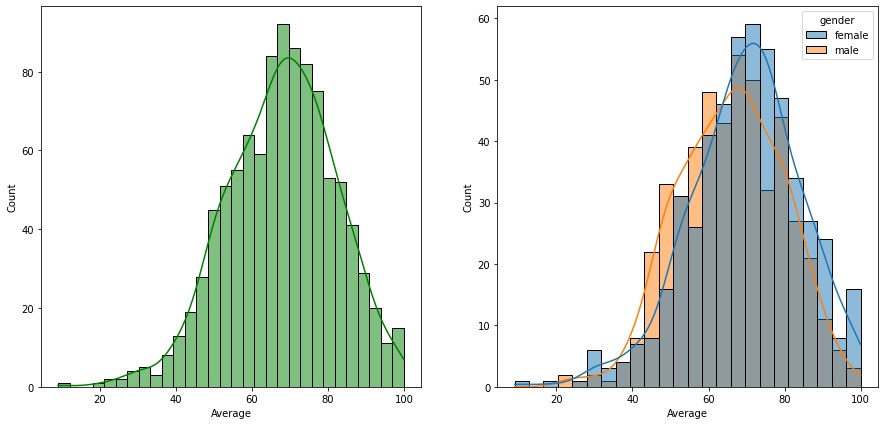

In [63]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average', kde=True, hue='gender')
plt.show()

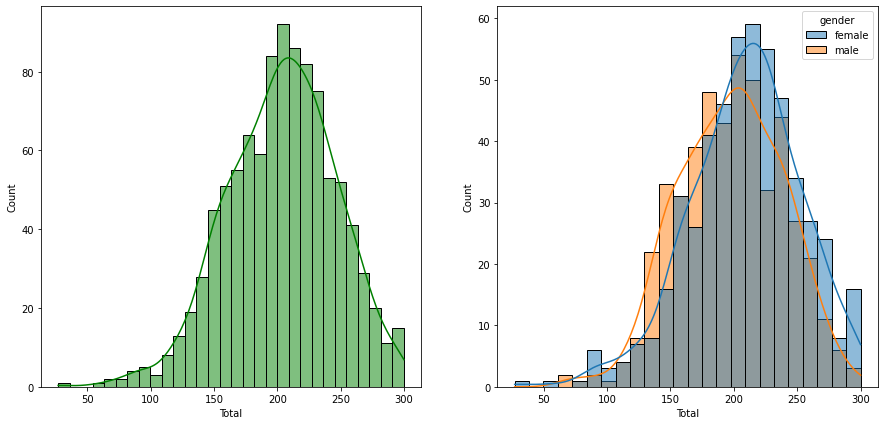

In [77]:
plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='Total', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Total', kde=True, hue='gender')
plt.show()

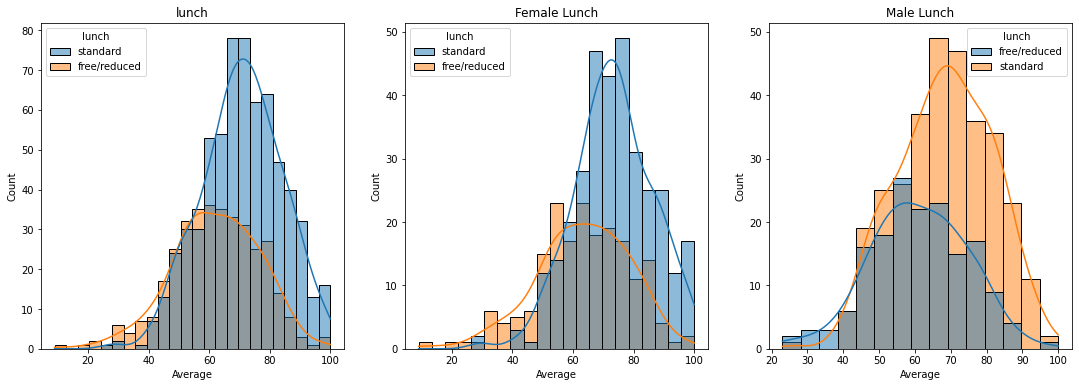

In [87]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
plt.title('lunch')
sns.histplot(data=df, x='Average', kde=True, hue='lunch')
plt.subplot(142)
plt.title('Female Lunch')
sns.histplot(data=df[df.gender=='female'], x='Average', kde=True, hue='lunch')
plt.subplot(143)
plt.title('Male Lunch')
sns.histplot(data=df[df.gender=='male'], x='Average', kde=True, hue='lunch')
plt.show()

Insights

1. standard lunch helps students perform better, irrespective of their gender

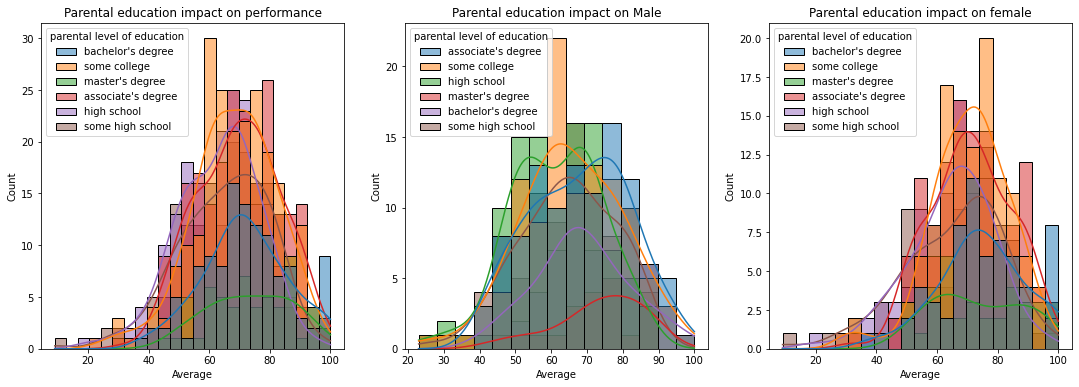

In [90]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
plt.title('Parental education impact on performance')
ax =sns.histplot(data=df,x='Average',kde=True,hue='parental level of education')
plt.subplot(142)
plt.title('Parental education impact on Male')
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental level of education')
plt.subplot(143)
plt.title('Parental education impact on female')
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental level of education')
plt.show()

Insights
1. The second plot shows that students whose parent's have associate or masters degree tend to perform well

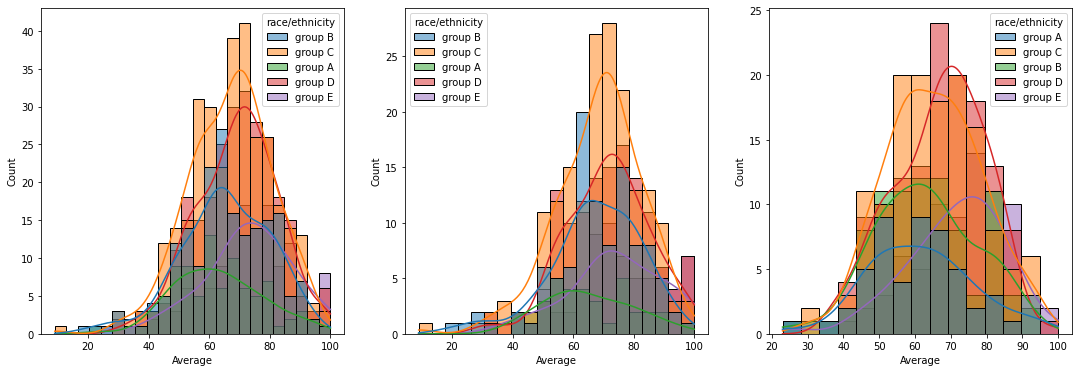

In [91]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race/ethnicity')
plt.show()

Insights
1. Students in group A & B tend to perform poorly irrespective of their gender.

#### 4.2. Max Score of students in all three subjects

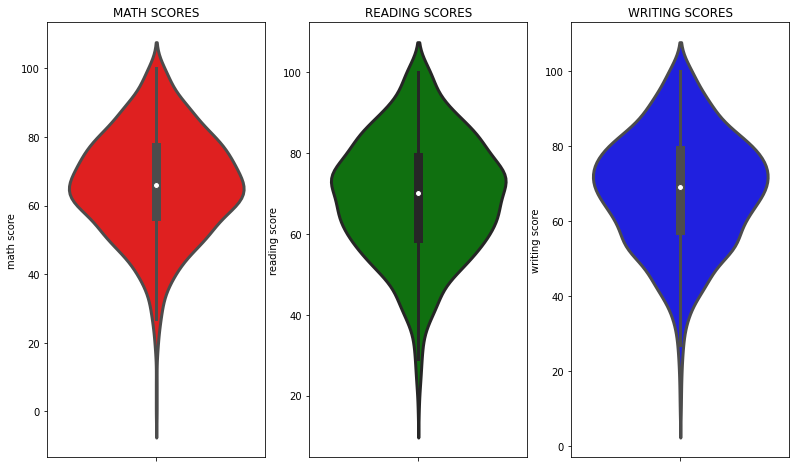

In [92]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

##### Insights
1. From the above three plots it is clear that most students score lower on average in Maths than reading or writing

#### 4.3. Multivariate Analysis Using Pieplot

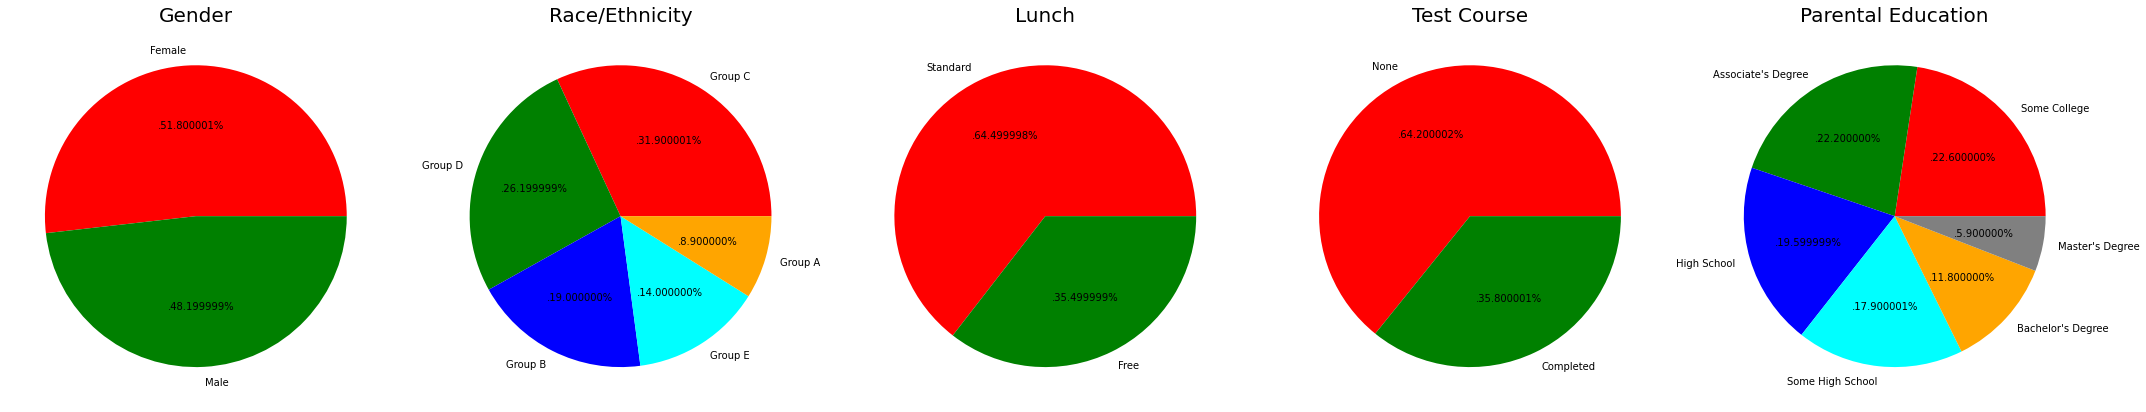

In [93]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels = labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct= '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

Insights
1. Students are split almost equally by gender
2. group C has more students than any other
3. Most students have standard lunch
4. More students have not enrolled for any test preparation
5. Students whose parental education is "some college" is greater followed by "associates degree"

#### 4.4. Feature-wise visualization
##### 4.4.1 Gender Feature
1. How are students distributed by gender?
2. Does gender have any impact on performance?

##### Univariate Analysis

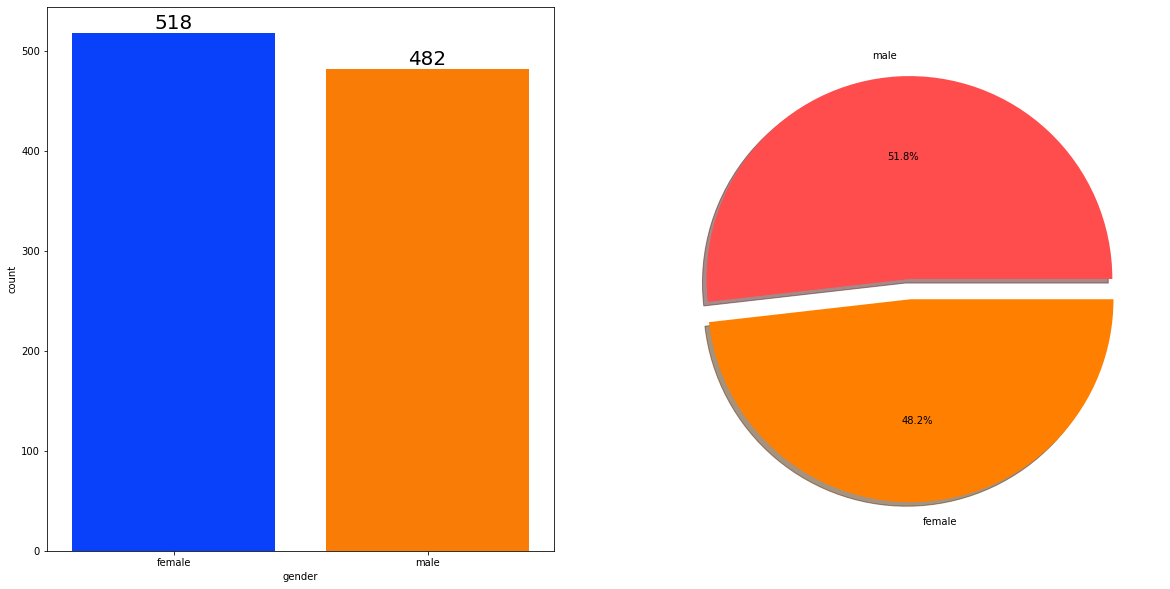

In [94]:
f,ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['gender'] , data=df, palette='bright', ax=ax[0], saturation=0.95 )
for container in ax[0].containers:
    ax[0].bar_label(container=container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=['male','female'], explode=[0,0.1], autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'] )
plt.show()

Insights
1. The dataset is almost perfectly balanced by gender

BIVARATE ANALYSIS (Does gender have any impact on Performance?)

In [95]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,Total,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


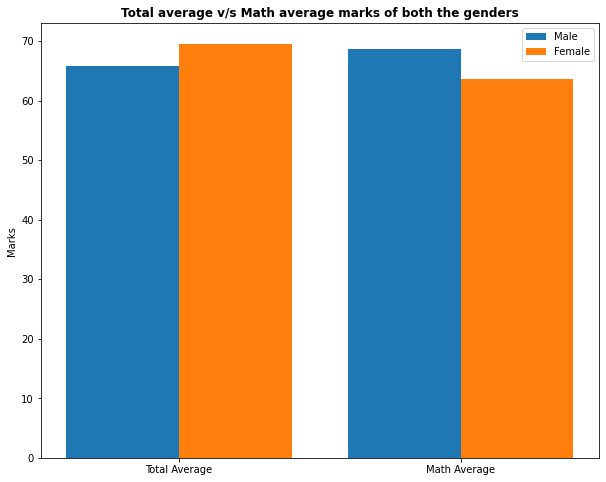

In [97]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average'][0], gender_group['math score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights
1. Female students perform better than Male students overall, while Male students perform better in mathematics

#### 4.4.2 RACE / ETHNICITY COLUMN
1. How is the distribution group wise?
2. Does Race/Ethnicity impact performance?

UNIVERATE ANALYSIS

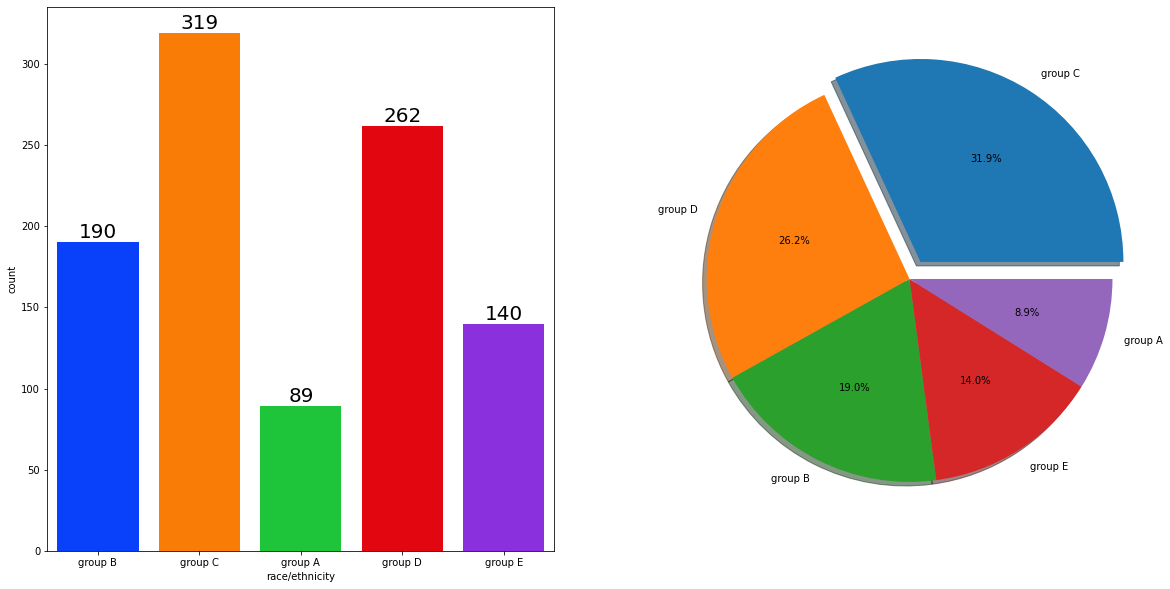

In [98]:
f,ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(x=df['race/ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container=container, color='black', size=20)

plt.pie(x = df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, explode=[0.1,0,0,0,0], autopct='%1.1f%%', shadow=True)
plt.show()


Insights
1. Most of the students belong to groups C & D
2. The lowest number of studetns belong to group A.

BIVARIATE ANALYSIS (Impage of Race/ethnicity on performance)

In [101]:
ethnic_group = df.groupby('race/ethnicity')
ethnic_group['math score'].mean()

race/ethnicity
group A    61.629213
group B    63.452632
group C    64.463950
group D    67.362595
group E    73.821429
Name: math score, dtype: float64

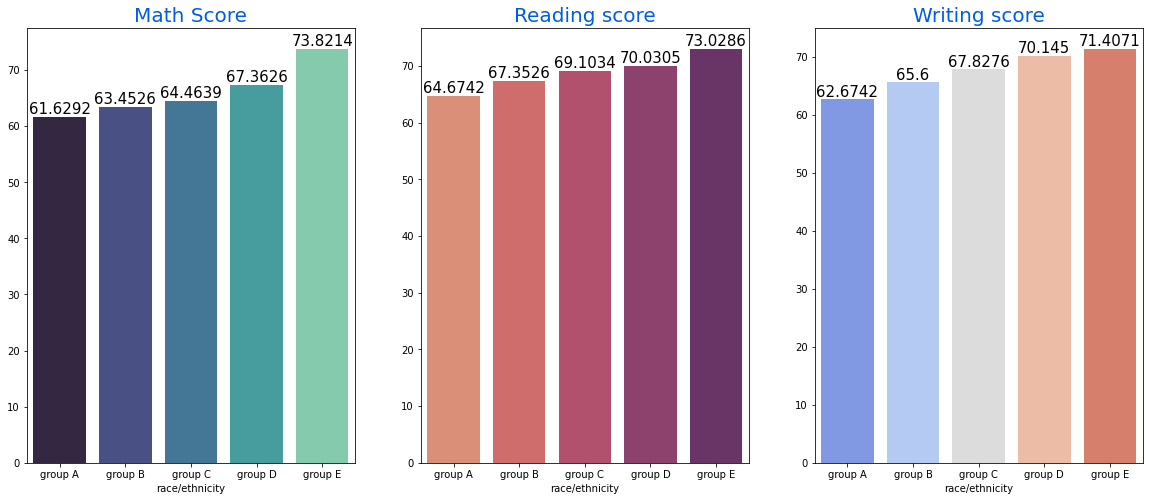

In [104]:
f,ax = plt.subplots(1,3, figsize=(20,8))
sns.barplot(x=ethnic_group['math score'].mean().index, y = ethnic_group['math score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container=container, color='black', size=15)

sns.barplot(x=ethnic_group['reading score'].mean().index,y=ethnic_group['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=ethnic_group['writing score'].mean().index,y=ethnic_group['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights:
1. Students in group E perform best in maths, reading & writing
2. Students from group A perform worst across all subjects

##### 4.4.3 Parental Level of Education
1. What is educational background of student's parent ?
2. Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

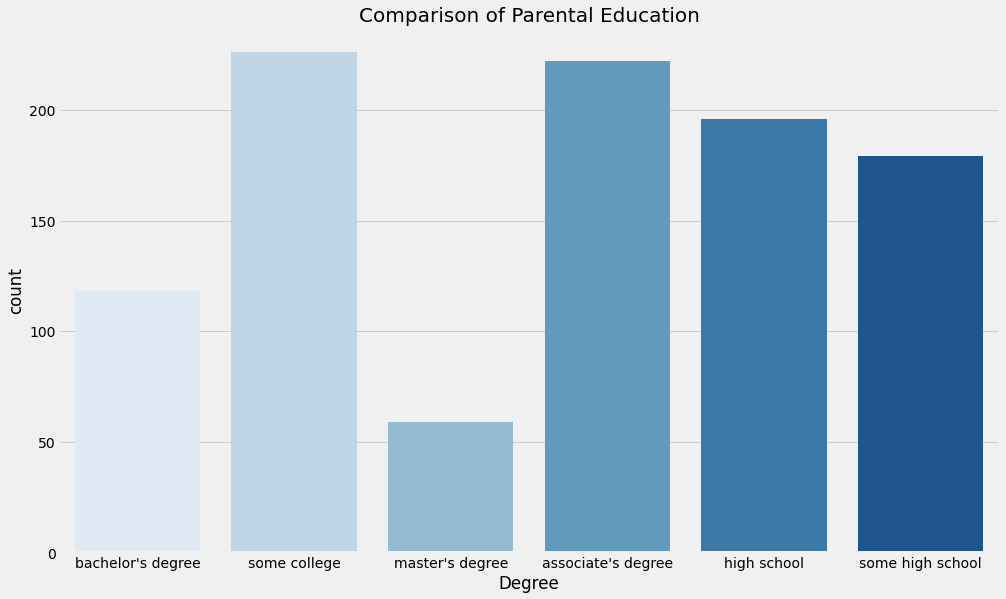

In [105]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights
1. Most parents attained "some college" level of education

#### BIVARIATE ANALYSIS (Does parental education have any impact on students performance?)

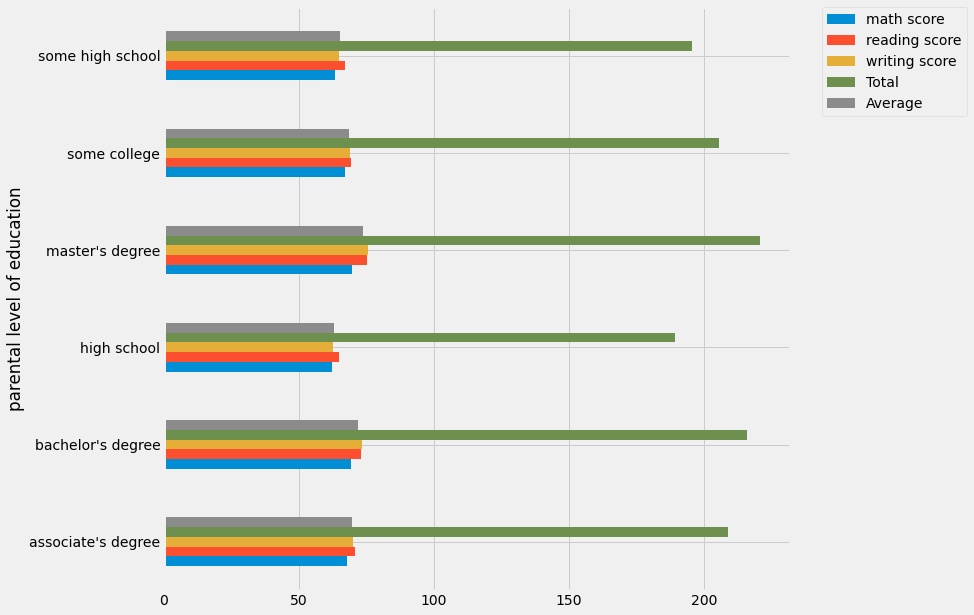

In [106]:
df.groupby('parental level of education').agg('mean').plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insights
1. The score of student whose parents possess master and bachelor level education are higher than others

#### 4.4.4. LUNCH COLUMN
1. Which type of lunch is most common amongst students?
2. What is the effect of lunch type of test results?

#### UNIVARIATE ANALYSIS (Which type of lunch is most common amongst students?)

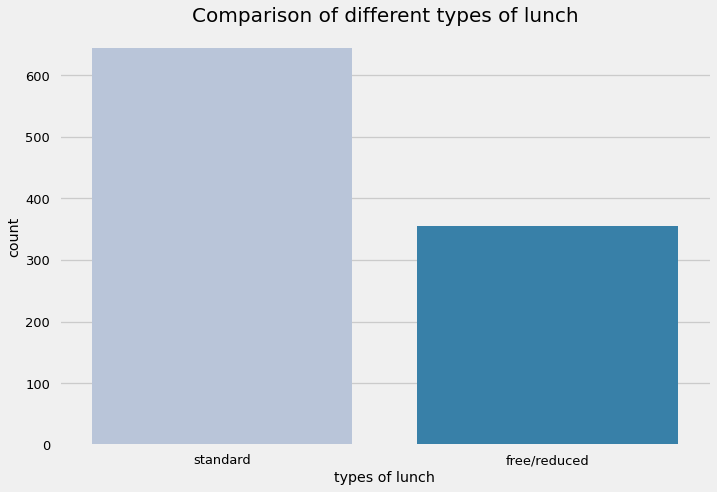

In [107]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insights
1. Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (Does lunch type impact student's performance?)

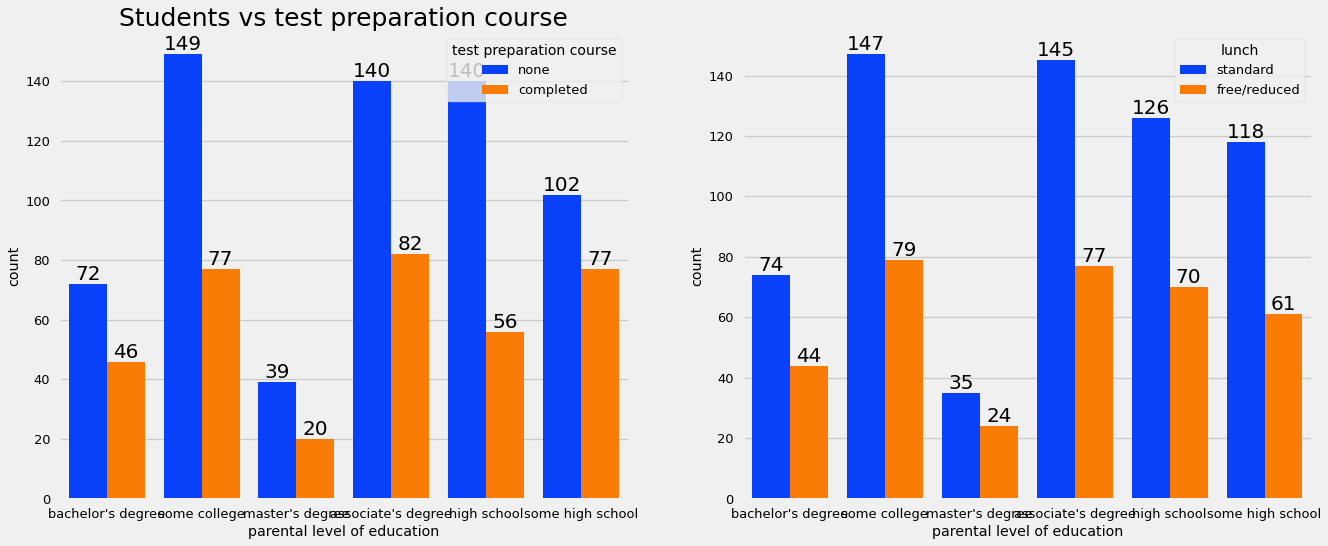

In [108]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'], data=df, palette='bright', hue='test preparation course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs test preparation course', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container=container, color='black', size=20)


sns.countplot(x=df['parental level of education'], data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container=container, color='black', size=20)

Insights
1. Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5. TEST PREPARATION COURSE COLUMN
1. Which type of lunch is most common amongst student?
2. Is test preparation course has any impact on studetn's performance?

<AxesSubplot:xlabel='lunch', ylabel='writing score'>

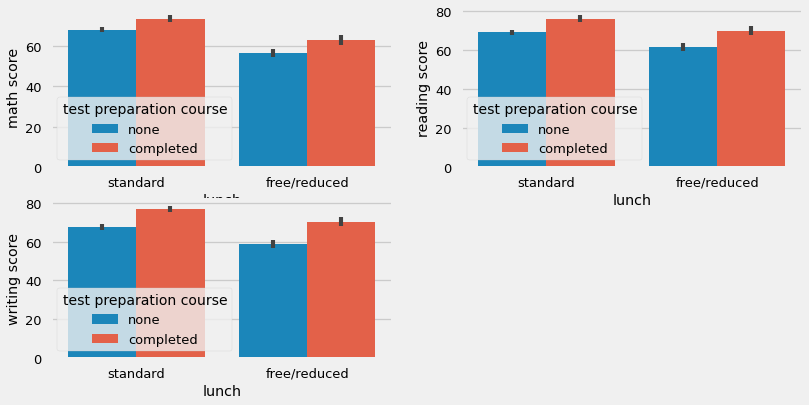

In [109]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

Insights
1. Students who have completed the Test preparation course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6. CHECKING OUTLIERS

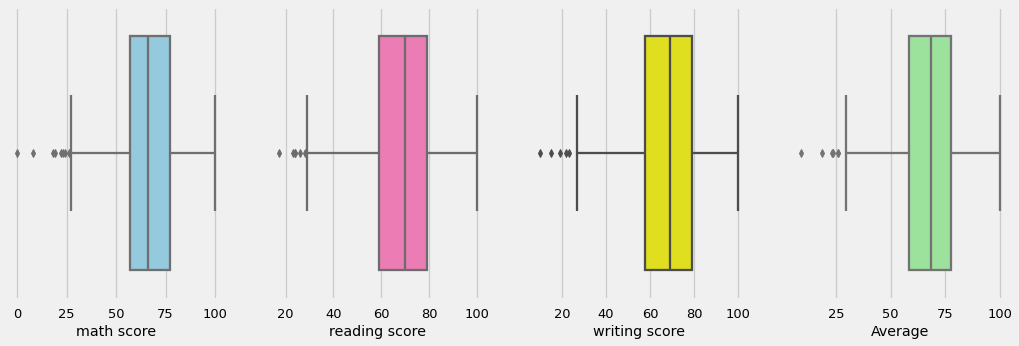

In [111]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

#### 4.4.7 MULTIVARIATE ANALYSIS USING PAIRPLOT

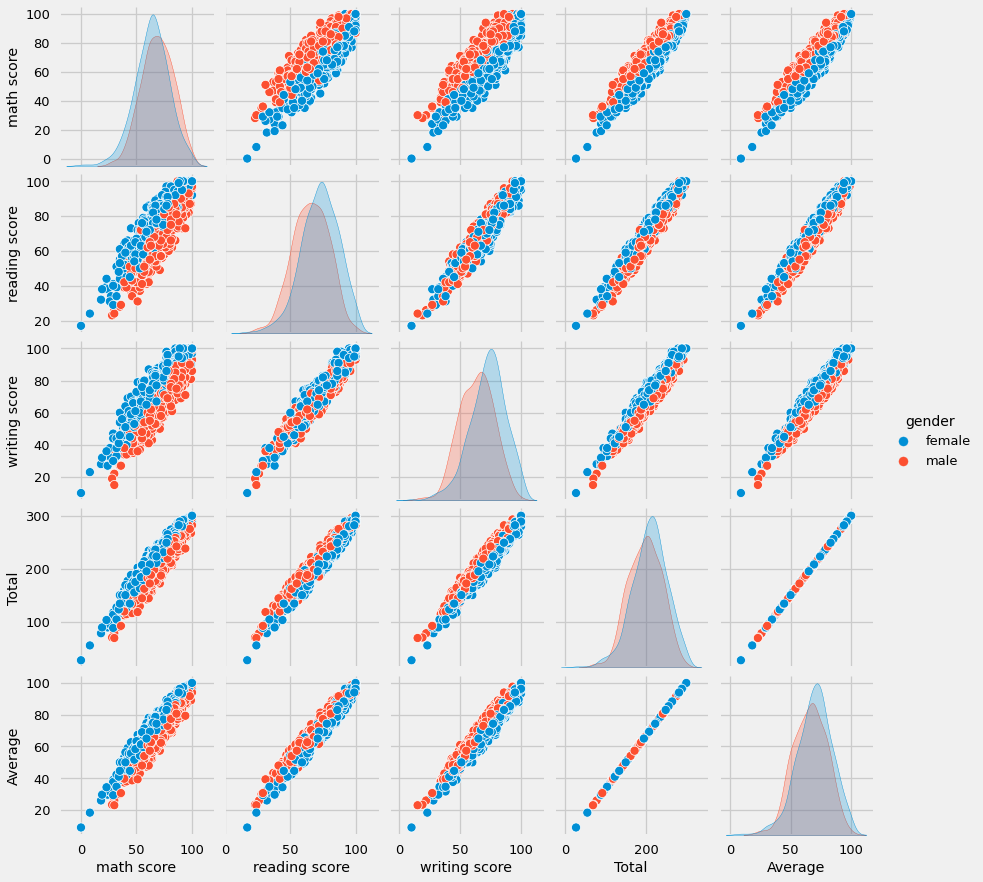

In [112]:
sns.pairplot(df, hue='gender')
plt.show()

Insights
1. From the above plot it is clear that all the scores increase linearly with each other

#### 5. Conclusions
1. Student's Performance is related with lunch, race, parental level education
2. Females lead in pass percentage and also are top-scorers
3. Student's Performance is not much related with test preparation course
4. Finishing preparation course is benefitial.